<a href="https://colab.research.google.com/github/lageniaestela/12demayo/blob/master/Trabajopractico33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


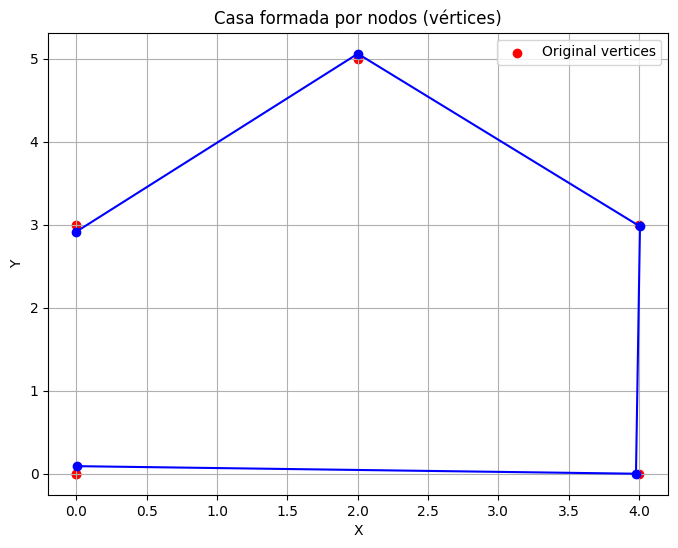

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Datos: vértices de una casa
# Cada fila es un vértice (x, y)
vertices = np.array([
    [0, 0],    # Base izquierda
    [4, 0],    # Base derecha
    [4, 3],    # Techo derecha
    [2, 5],    # Pico del techo
    [0, 3],    # Techo izquierdo
    [0, 0],    # Volver a base izquierda para cerrar
])

# Separar en características y etiquetas (aquí solo para ejemplo, usamos los mismos datos)
x_train = vertices[:-1]
y_train = vertices[:-1]

# Crear el modelo simple
model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2)  # Salida que predice vértices
])

model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=500, verbose=0)

# Generar nuevos vértices con el modelo
predicted_vertices = model.predict(x_train)

# Visualización
plt.figure(figsize=(8,6))
# Dibujar los vértices predichos
plt.plot(predicted_vertices[:,0], predicted_vertices[:,1], 'bo-')  # puntos y línea
# Mostrar los vértices originales para comparar
plt.scatter(vertices[:,0], vertices[:,1], color='red', label='Original vertices')
plt.legend()
plt.title('Casa formada por nodos (vértices)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

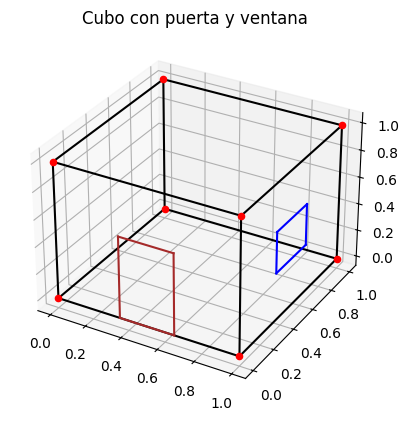

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Nodos (vértices del cubo)
nodos = [
    (0, 0, 0),  # A 0
    (1, 0, 0),  # B 1
    (1, 1, 0),  # C 2
    (0, 1, 0),  # D 3
    (0, 0, 1),  # E 4
    (1, 0, 1),  # F 5
    (1, 1, 1),  # G 6
    (0, 1, 1)   # H 7
]

# Aristas del cubo
aristas = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # abajo
    (4, 5), (5, 6), (6, 7), (7, 4),  # arriba
    (0, 4), (1, 5), (2, 6), (3, 7)   # verticales
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar nodos
for x, y, z in nodos:
    ax.scatter(x, y, z, color='red')

# Dibujar aristas
for i, j in aristas:
    x = [nodos[i][0], nodos[j][0]]
    y = [nodos[i][1], nodos[j][1]]
    z = [nodos[i][2], nodos[j][2]]
    ax.plot(x, y, z, color='black')

# ➕ PUERTA en la cara frontal (A-B-F-E)
# coordenadas del rectángulo (más chica que la cara)
puerta = [
    (0.35, 0, 0),  # abajo izq
    (0.65, 0, 0),  # abajo der
    (0.65, 0, 0.6),  # arriba der
    (0.35, 0, 0.6),  # arriba izq
    (0.35, 0, 0)   # cerrar
]

# Dibujar la puerta
for i in range(len(puerta) - 1):
    x = [puerta[i][0], puerta[i+1][0]]
    y = [puerta[i][1], puerta[i+1][1]]
    z = [puerta[i][2], puerta[i+1][2]]
    ax.plot(x, y, z, color='brown')

# ➕ VENTANA en la cara derecha (B-C-G-F)
ventana = [
    (1, 0.35, 0.35),
    (1, 0.65, 0.35),
    (1, 0.65, 0.65),
    (1, 0.35, 0.65),
    (1, 0.35, 0.35)
]

# Dibujar la ventana
for i in range(len(ventana) - 1):
    x = [ventana[i][0], ventana[i+1][0]]
    y = [ventana[i][1], ventana[i+1][1]]
    z = [ventana[i][2], ventana[i+1][2]]
    ax.plot(x, y, z, color='blue')

plt.title("Cubo con puerta y ventana")
plt.show()


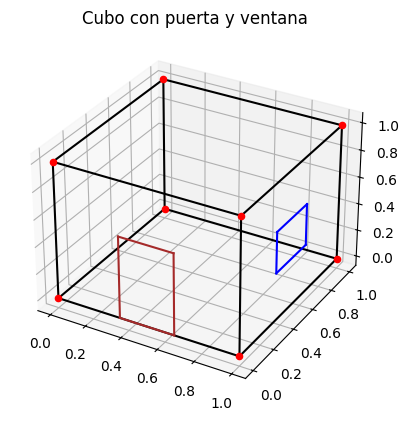

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicciones: [[0.34902138 0.2924661  0.1978634 ]
 [0.92687136 0.50448865 0.32313493]
 [0.98534405 0.66552424 0.56964433]
 [0.19555202 0.4149506  0.43020976]
 [0.04864738 0.33494627 0.6183621 ]
 [0.7927379  0.5928401  0.66632456]
 [0.93810207 0.72378916 0.87135917]
 [0.08663718 0.44046086 0.8073317 ]]


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Nodos (vértices del cubo)
nodos = [
    (0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 1, 0),
    (0, 0, 1), (1, 0, 1), (1, 1, 1), (0, 1, 1)
]

# Aristas del cubo
aristas = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar nodos
for x, y, z in nodos:
    ax.scatter(x, y, z, color='red')

# Dibujar aristas
for i, j in aristas:
    x = [nodos[i][0], nodos[j][0]]
    y = [nodos[i][1], nodos[j][1]]
    z = [nodos[i][2], nodos[j][2]]
    ax.plot(x, y, z, color='black')

# ➕ PUERTA
puerta = [(0.35, 0, 0), (0.65, 0, 0), (0.65, 0, 0.6), (0.35, 0, 0.6), (0.35, 0, 0)]
for i in range(len(puerta) - 1):
    x = [puerta[i][0], puerta[i+1][0]]
    y = [puerta[i][1], puerta[i+1][1]]
    z = [puerta[i][2], puerta[i+1][2]]
    ax.plot(x, y, z, color='brown')

# ➕ VENTANA
ventana = [(1, 0.35, 0.35), (1, 0.65, 0.35), (1, 0.65, 0.65), (1, 0.35, 0.65), (1, 0.35, 0.35)]
for i in range(len(ventana) - 1):
    x = [ventana[i][0], ventana[i+1][0]]
    y = [ventana[i][1], ventana[i+1][1]]
    z = [ventana[i][2], ventana[i+1][2]]
    ax.plot(x, y, z, color='blue')

plt.title("Cubo con puerta y ventana")
plt.show()


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Datos de entrada: nodos originales
nodos_array = np.array(nodos)
X = nodos_array
y = nodos_array + 0.1  # simulamos una transformación simple

# Modelo de red neuronal
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(3)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

# Predicción
predicted = model.predict(X)
print("Predicciones:", predicted)